In [1]:
from qiskit import *
from qiskit_ibm_runtime import QiskitRuntimeService, Session, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

%matplotlib inline

In [2]:
circuit = QuantumCircuit(2,1)

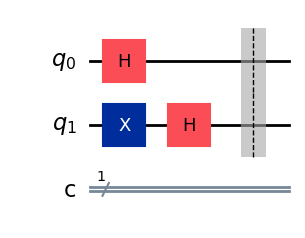

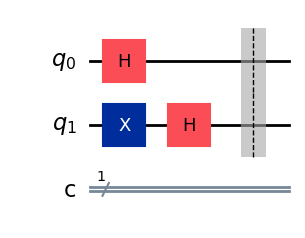

In [3]:
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.barrier()
circuit.draw(output='mpl')

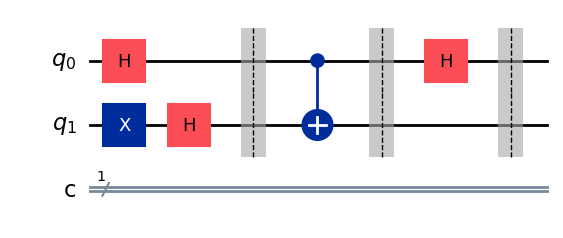

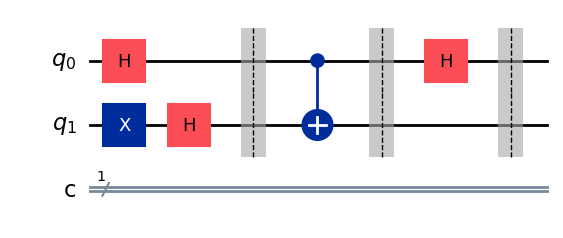

In [4]:
circuit.cx(0,1)
circuit.barrier()
circuit.h(0)
circuit.barrier()
circuit.draw(output='mpl')

In [5]:
circuit.measure(0,0)

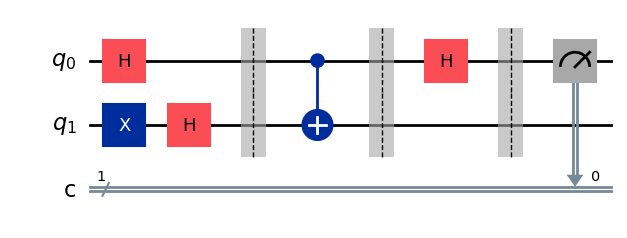

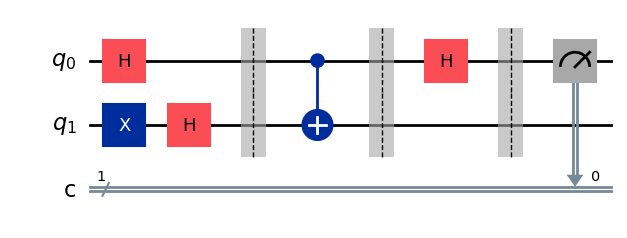

In [6]:
circuit.draw(output='mpl')

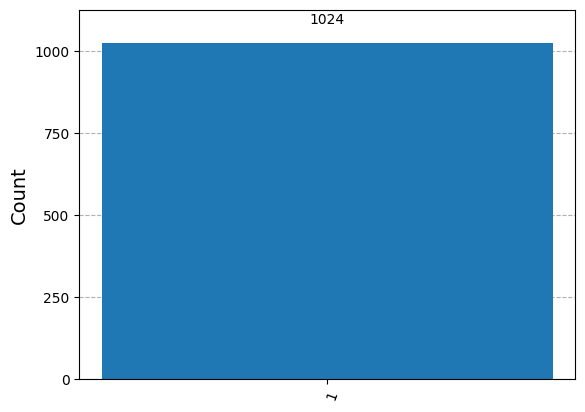

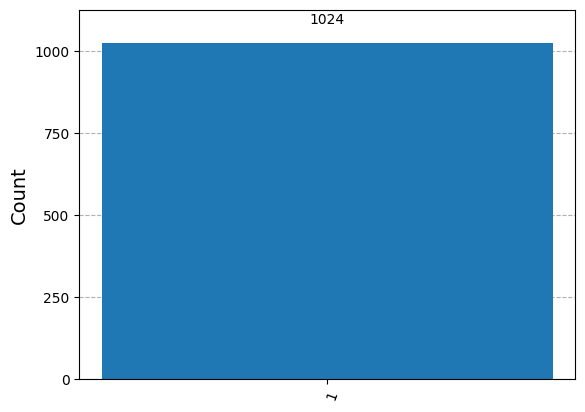

In [7]:
backend = AerSimulator()
result = backend.run([circuit], shots=1024).result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [8]:
#Real Quantum Computer

In [9]:
service = QiskitRuntimeService(channel="ibm_quantum")

In [10]:
for backend in service.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    print(f"{backend.name} : {backend.status().pending_jobs} & {qubit_count} qubits")

ibm_brisbane : 132 & 127 qubits
ibm_kyiv : 2 & 127 qubits
ibm_sherbrooke : 0 & 127 qubits


In [11]:
quantum_computer = service.backend("ibm_kyiv")

In [16]:
pm = generate_preset_pass_manager(backend=quantum_computer, optimization_level=1)
isa_qc = pm.run(circuit)
sampler = Sampler(quantum_computer)
job = sampler.run([isa_qc], shots=1024)
result = job.result()
print(result)

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=1>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2025-02-07 14:44:07', stop='2025-02-07 14:44:16', size=1024>)])}, 'version': 2})


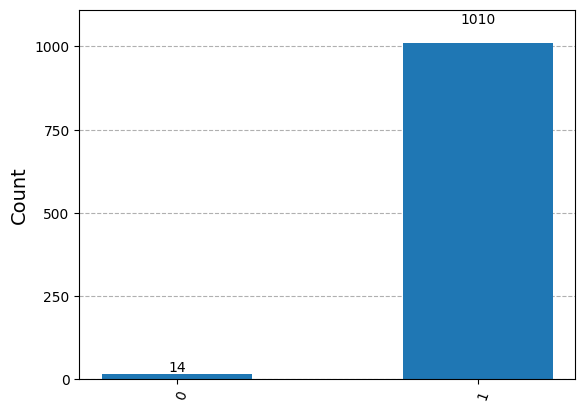

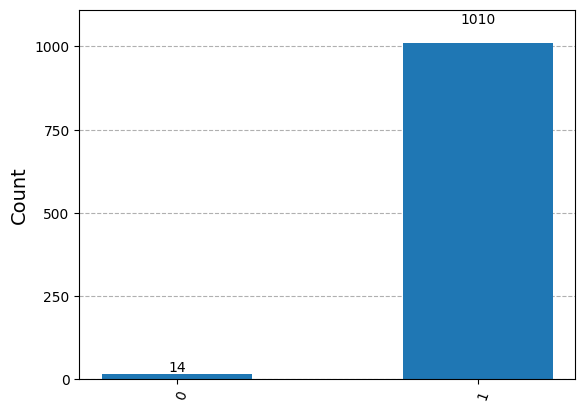

In [17]:
quantum_counts = result[0].data.c.get_counts()
plot_histogram([quantum_counts])